In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import numpy as np
from scipy import ndimage as ndi
import math
from skimage import (
    exposure, io, filters, color, data, restoration
)

In [2]:
data = io.imread("/groups/gerlich/labinfo/scratch/python_club_2021/test_images/4947_WT_G2_Fully_cyclinB1_20minrelease_H3S10_1-03-01.czi #1.tif_registered.tif")
print("shape: {}".format(data.shape))
print("dtype: {}".format(data.dtype))
print("range: ({}, {})".format(data.min(), data.max()))

shape: (57, 740, 740, 4)
dtype: uint16
range: (0, 7699)


In [3]:
#Channel 3: f-ara-EdU (green),
data_edu = data[:,:,:,2]
#Channel 4 – DNA(Hoechst) (magenta)
data_hoechst = data[:,:,:,3]

In [4]:
#plt.imshow(data_edu)
#this line fails as a slice has not been specified

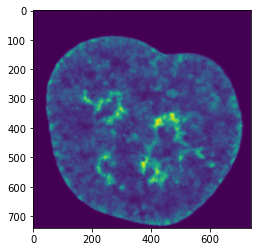

In [5]:
plt.imshow(data_edu[27,:,:])

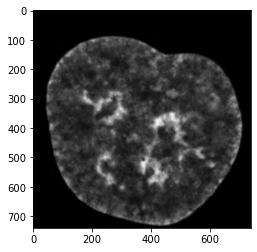

In [6]:
plt.imshow(data_edu[27,:,:],cmap="gray")

In [7]:
def display(im3d, cmap="gray", step=1, chosen = None, savefig = False):
    if chosen is None: 
        chosen = []
    stack_size = im3d.shape[0]
    cols = 5
    rows = math.ceil((stack_size/cols))
    
    h , axes = plt.subplots(nrows=rows, ncols=cols, figsize=(3*cols, 3*rows)) 
    vmin = im3d.min()
    vmax = im3d.max()
    enum = 0
    for ax, image in zip(axes.flatten(), im3d[::step]):
        ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
        if enum in chosen:
            for axis in ['top','bottom','left','right']:
                #ax.spines[axis].set_linewidth(0.5)
                ax.spines[axis].set_color("red")
                ax.spines[axis].set_linewidth(5)
        ax.set_xticks([])
        ax.set_yticks([])
        enum += 1
    if savefig is True:
        plt.savefig('slice_gallery.png')

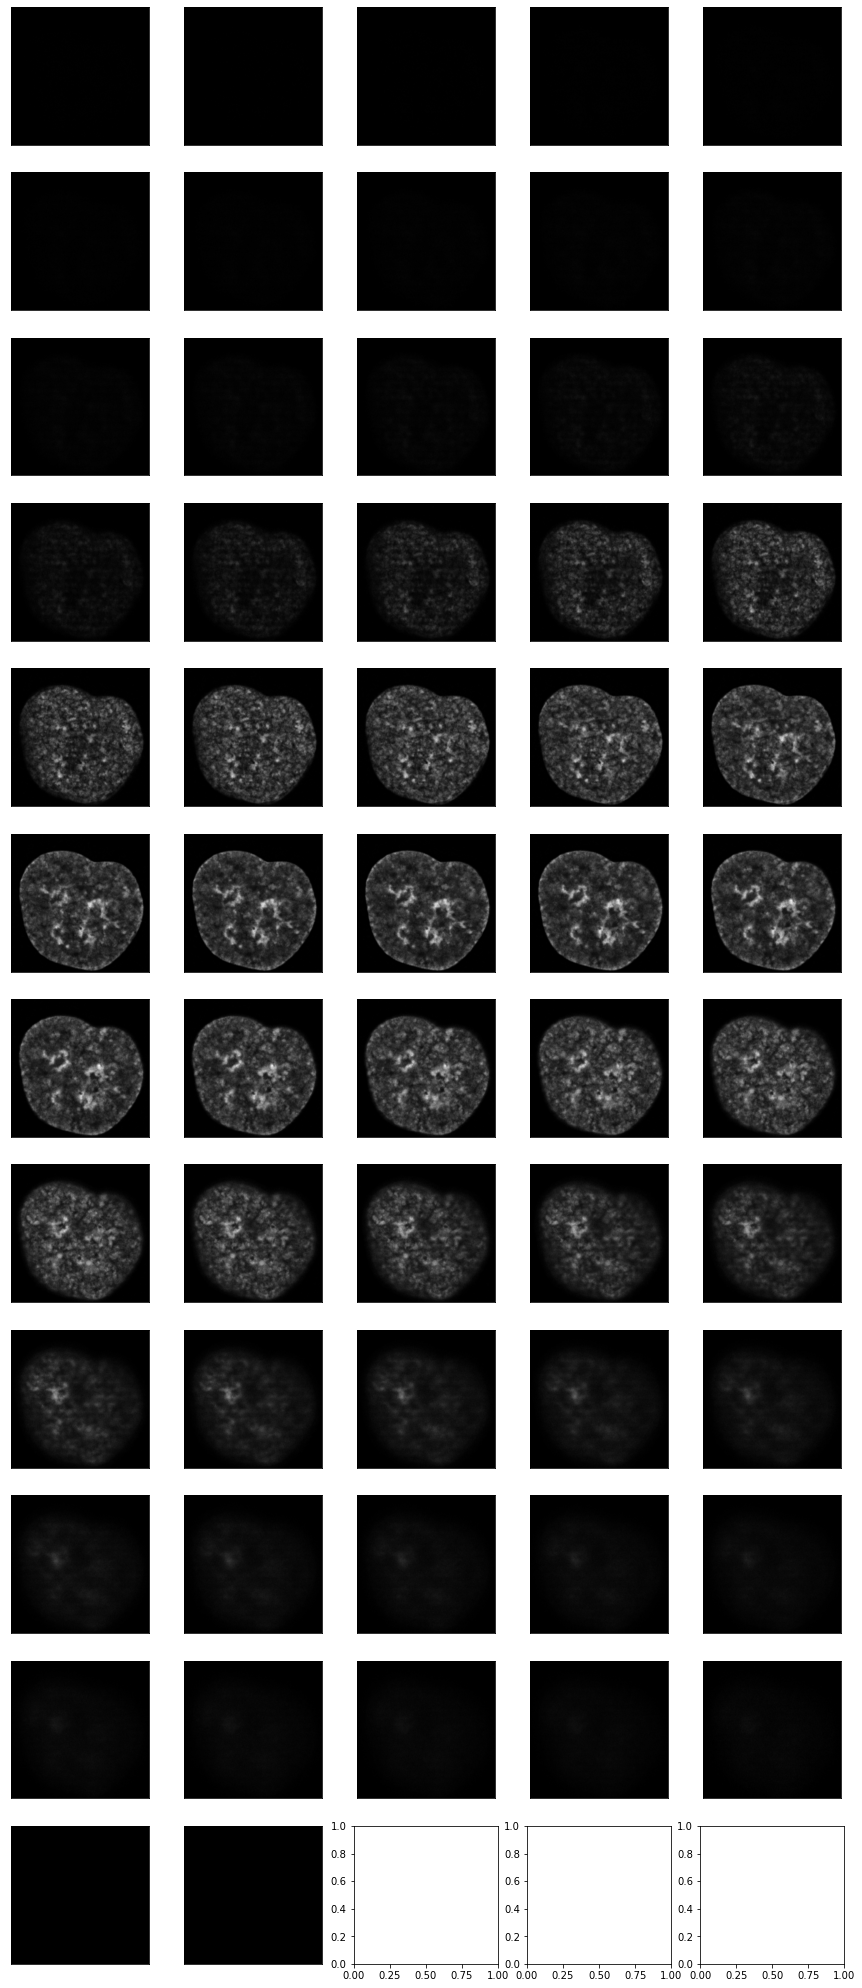

In [8]:
display(data_edu)

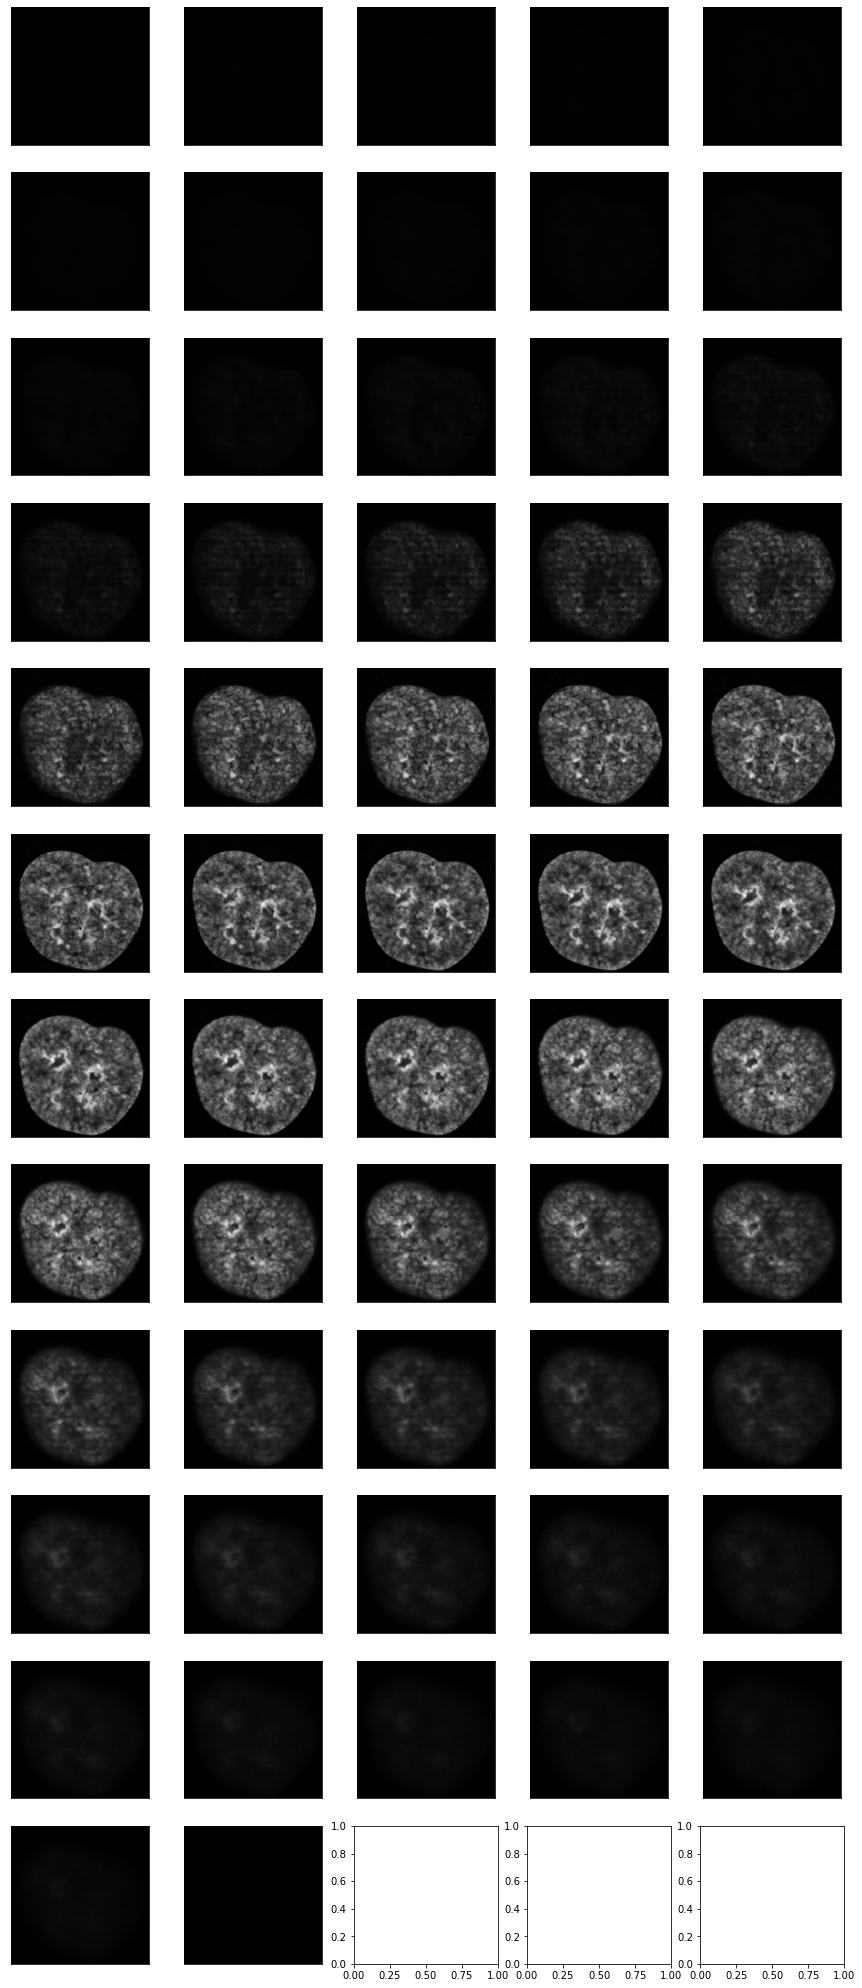

In [9]:
display(data_hoechst)

In [10]:
"""
HW Task 1:
Write a new display function:

That has 4 columns with the corresponding hoechst and edu channels next to each other (hoechst1, edu1, hoechst2, edu2)
Display one in red and one in green to make the channels more obvious
Only display every 3rd image in the stack
A second function that has 6 columns and displays the difference between the two channels in the 3rd and 6th column
Use an appropriate color map
Bonus: Works with an uneven number of images.

Most difficult step is displaying two channels simultaneously
"""

'\nHW Task 1:\nWrite a new display function:\n\nThat has 4 columns with the corresponding hoechst and edu channels next to each other (hoechst1, edu1, hoechst2, edu2)\nDisplay one in red and one in green to make the channels more obvious\nOnly display every 3rd image in the stack\nA second function that has 6 columns and displays the difference between the two channels in the 3rd and 6th column\nUse an appropriate color map\nBonus: Works with an uneven number of images.\n\nMost difficult step is displaying two channels simultaneously\n'

In [10]:
#this is an attempt at HW1 with two separate channels
def HW1_display_1(im3d_ch1, im3d_ch2, cmap_ch1="Greens", cmap_ch2="Reds", step=3, numchannels=2, chosen = None, savefig = False):
    if chosen is None: 
        chosen = []
    stack_size = im3d_ch1.shape[0]
    cols = 4
    rows = math.ceil((stack_size/cols)*numchannels/step)
    
    h , axes = plt.subplots(nrows=rows, ncols=cols, figsize=(3*cols, 3*rows)) 
    vmin_ch1 = im3d_ch1.min()
    vmax_ch1 = im3d_ch1.max()
    vmin_ch2 = im3d_ch2.min()
    vmax_ch2 = im3d_ch2.max()
    enum = 0
    for ax, image_ch1, image_ch2 in zip(axes.flatten(), im3d_ch1[::step], im3d_ch2[::step]):
        ax.imshow(image_ch1, cmap=cmap_ch1, vmin=vmin_ch1, vmax=vmax_ch1)
        ax.imshow(image_ch2, cmap=cmap_ch1, vmin=vmin_ch1, vmax=vmax_ch1)
        if enum in chosen:
            for axis in ['top','bottom','left','right']:
                #ax.spines[axis].set_linewidth(0.5)
                ax.spines[axis].set_color("red")
                ax.spines[axis].set_linewidth(5)
        ax.set_xticks([])
        ax.set_yticks([])
        enum += 1
    if savefig is True:
        plt.savefig('slice_gallery.png')

In [20]:
#this is an attempt at HW1 with one combined input
def HW1_display_2(im3d, cmap="gray", step=3, numchannels=2, chosen = None, savefig = False):
    if chosen is None: 
        chosen = []
    im3d_combined=im3d[:,:,:,2:4]
    stack_size = im3d.shape[0]
    cols = 4
    rows = math.ceil((stack_size/cols)*numchannels/step)
    
    h , axes = plt.subplots(nrows=rows, ncols=cols, figsize=(3*cols, 3*rows)) 
    vmin = im3d_combined[0].min()
    vmax = im3d_combined[0].max()
    enum = 0
    for ax, image, in zip(axes.flatten(), im3d_combined[:,:,step,1]):
        ax.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
        if enum in chosen:
            for axis in ['top','bottom','left','right']:
                #ax.spines[axis].set_linewidth(0.5)
                ax.spines[axis].set_color("red")
                ax.spines[axis].set_linewidth(5)
        ax.set_xticks([])
        ax.set_yticks([])
        enum += 1
    if savefig is True:
        plt.savefig('slice_gallery.png')

In [21]:
data_hoechst.shape[0]

57

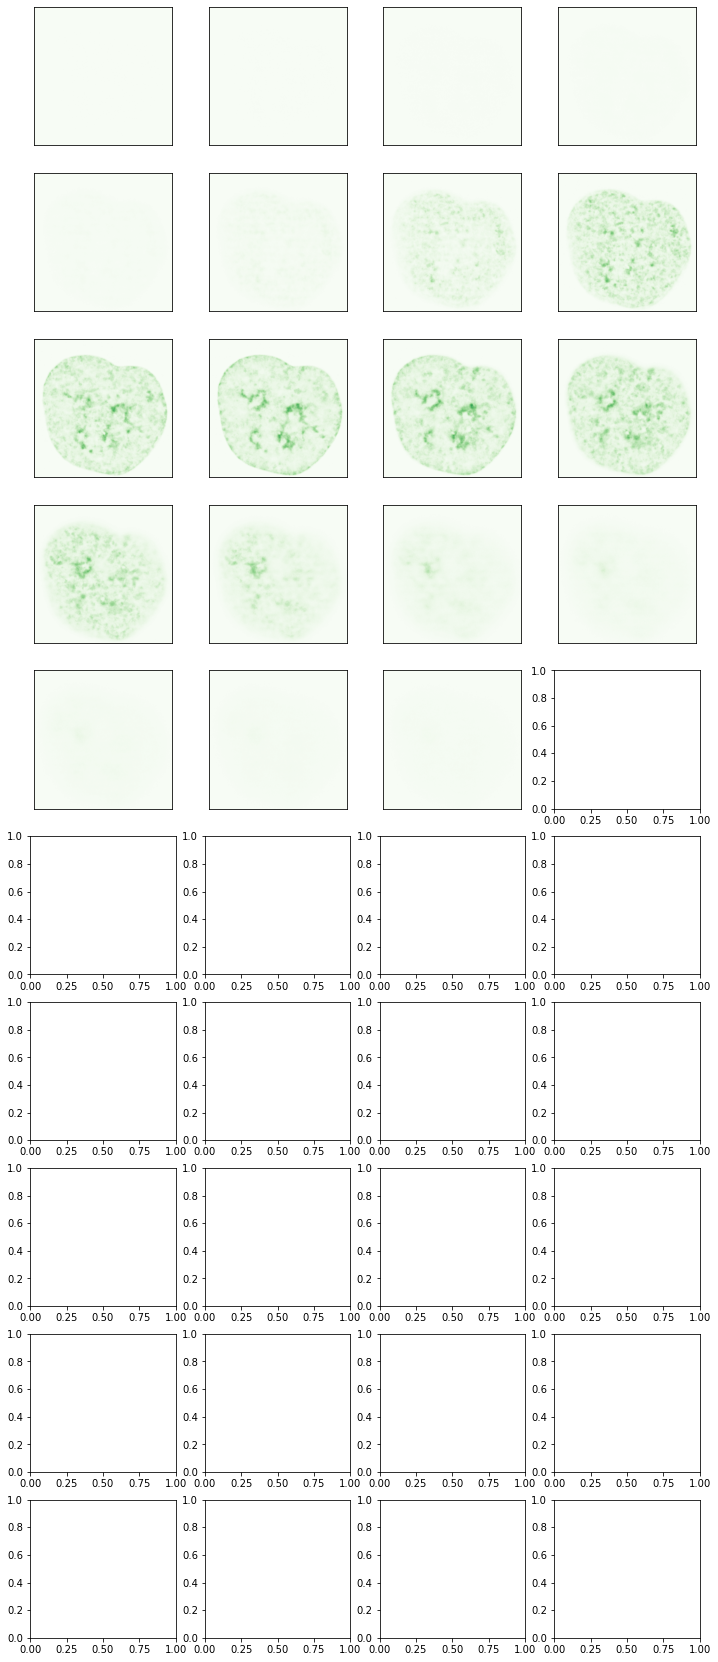

In [22]:
HW1_display_1(data_hoechst, data_edu)

In [23]:
data_combined = data[:,:,:,2:4]
data_combined.shape

(57, 740, 740, 2)

ValueError: zero-size array to reduction operation minimum which has no identity

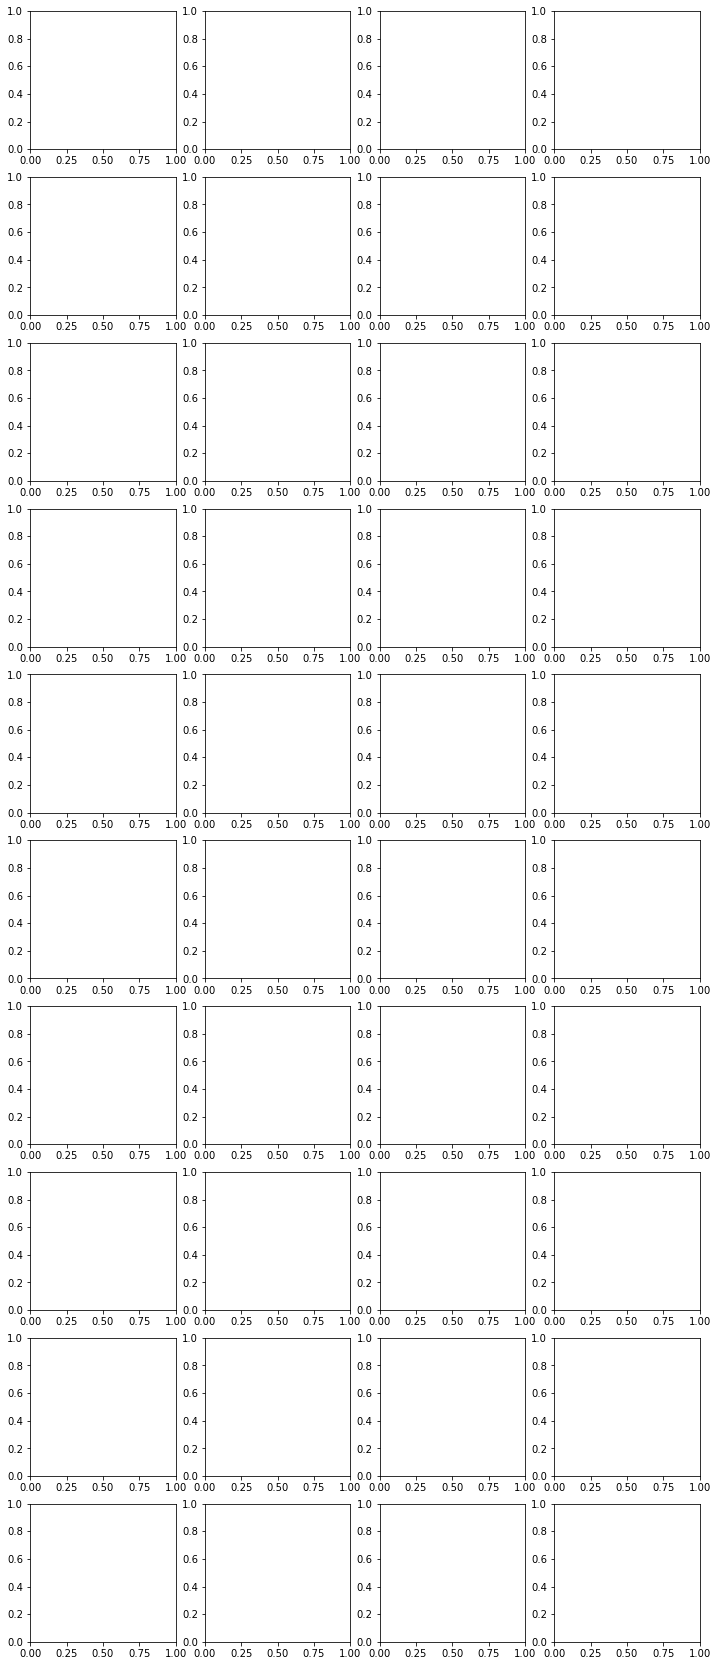

In [25]:
HW1_display_2(data_combined)
#this line fails at the "vmin" / "vmax" line, despite trying to specify a channel - do I need separate lines for each channel?

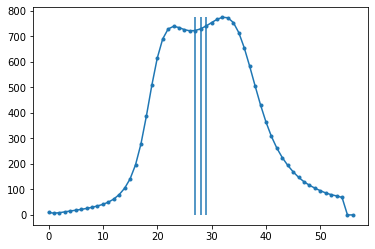

In [26]:
hist=[]
for i in range(57):
    hist.append(data_edu[i,:,:].mean())
plt.plot(range(57),hist,'.-')
#user selected slices
plt.vlines([27,28,29],0,max(hist))

In [27]:
data2 = io.imread("/groups/gerlich/labinfo/scratch/python_club_2021/test_images/4947_WT_Hemi_cyclinB1_H3S10_1_20_min_release_nodrug-67.czi #5.tif_registered.tif")
data2_edu = data2[:,:,:,2]
print("shape: {}".format(data2.shape))
print("dtype: {}".format(data2.dtype))
print("range: ({}, {})".format(data2.min(), data2.max()))

shape: (83, 740, 740, 4)
dtype: uint16
range: (0, 7868)


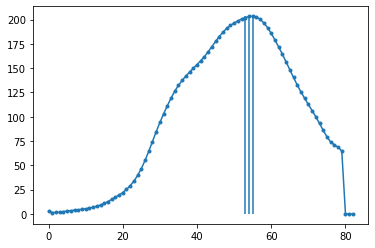

In [28]:
hist = []
for i in range(len(data2_edu)):
    hist.append(data2_edu[i,:,:].mean())
plt.plot(range(len(data2_edu)),hist,'.-')
#user selected slices
plt.vlines([53,54,55],0,max(hist))

In [29]:
"""
HW Task2:
Imitate the user choice above. He wants the central 3 sections of a cell.
Write a function that automatically chooses slices close to the selection above. (Do not hard code anything asume it should work on any new image.)
Use the histogram above for the selection.
Start with data2_edu, then try it for the data_edu
"""

'\nHW Task2:\nImitate the user choice above. He wants the central 3 sections of a cell.\nWrite a function that automatically chooses slices close to the selection above. (Do not hard code anything asume it should work on any new image.)\nUse the histogram above for the selection.\nStart with data2_edu, then try it for the data_edu\n'

maxslice is 55


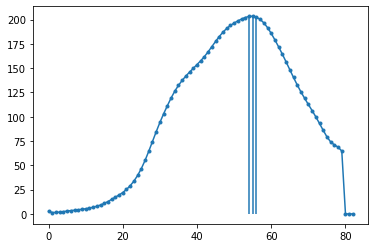

In [30]:
hist = []
for i in range(len(data2_edu)):
    hist.append(data2_edu[i,:,:].mean())
plt.plot(range(len(data2_edu)),hist,'.-')
#define central slice as slice with highest intensity
imean=0
for i in range(len(data2_edu)):
    if data2_edu[i,:,:].mean() > imean:
        maxslice=i
    imean=data2_edu[i,:,:].mean()
print("maxslice is",maxslice)
plt.vlines([maxslice-1,maxslice,maxslice+1],0,max(hist))

maxslice is 32


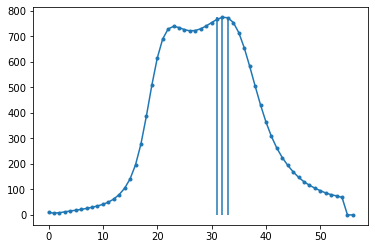

In [32]:
hist = []
for i in range(len(data_edu)):
    hist.append(data_edu[i,:,:].mean())
plt.plot(range(len(data_edu)),hist,'.-')
#define central slice as slice with highest intensity
imean=0
for i in range(len(data_edu)):
    if data_edu[i,:,:].mean() > imean:
        maxslice=i
    imean=data_edu[i,:,:].mean()
print("maxslice is",maxslice)
plt.vlines([maxslice-1,maxslice,maxslice+1],0,max(hist))

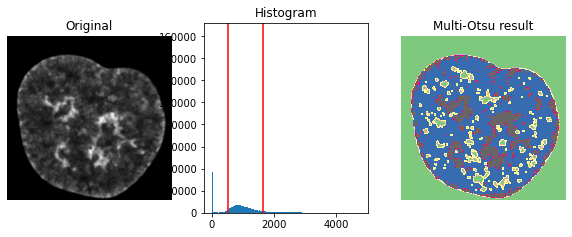

In [33]:
# The input image.
image = data_edu[27,:,:]

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = filters.threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [34]:
tresh = filters.threshold_li(image)
binary_mask = image > tresh

In [35]:
tresh

256.61331106504946

In [36]:
binary_mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

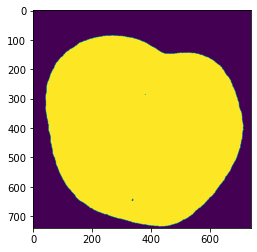

In [37]:
plt.imshow(binary_mask)

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

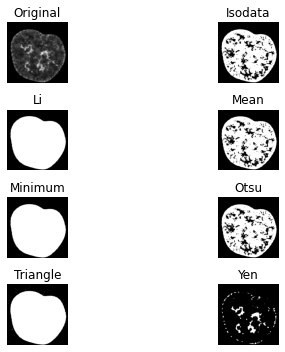

In [38]:
filters.try_all_threshold(image)

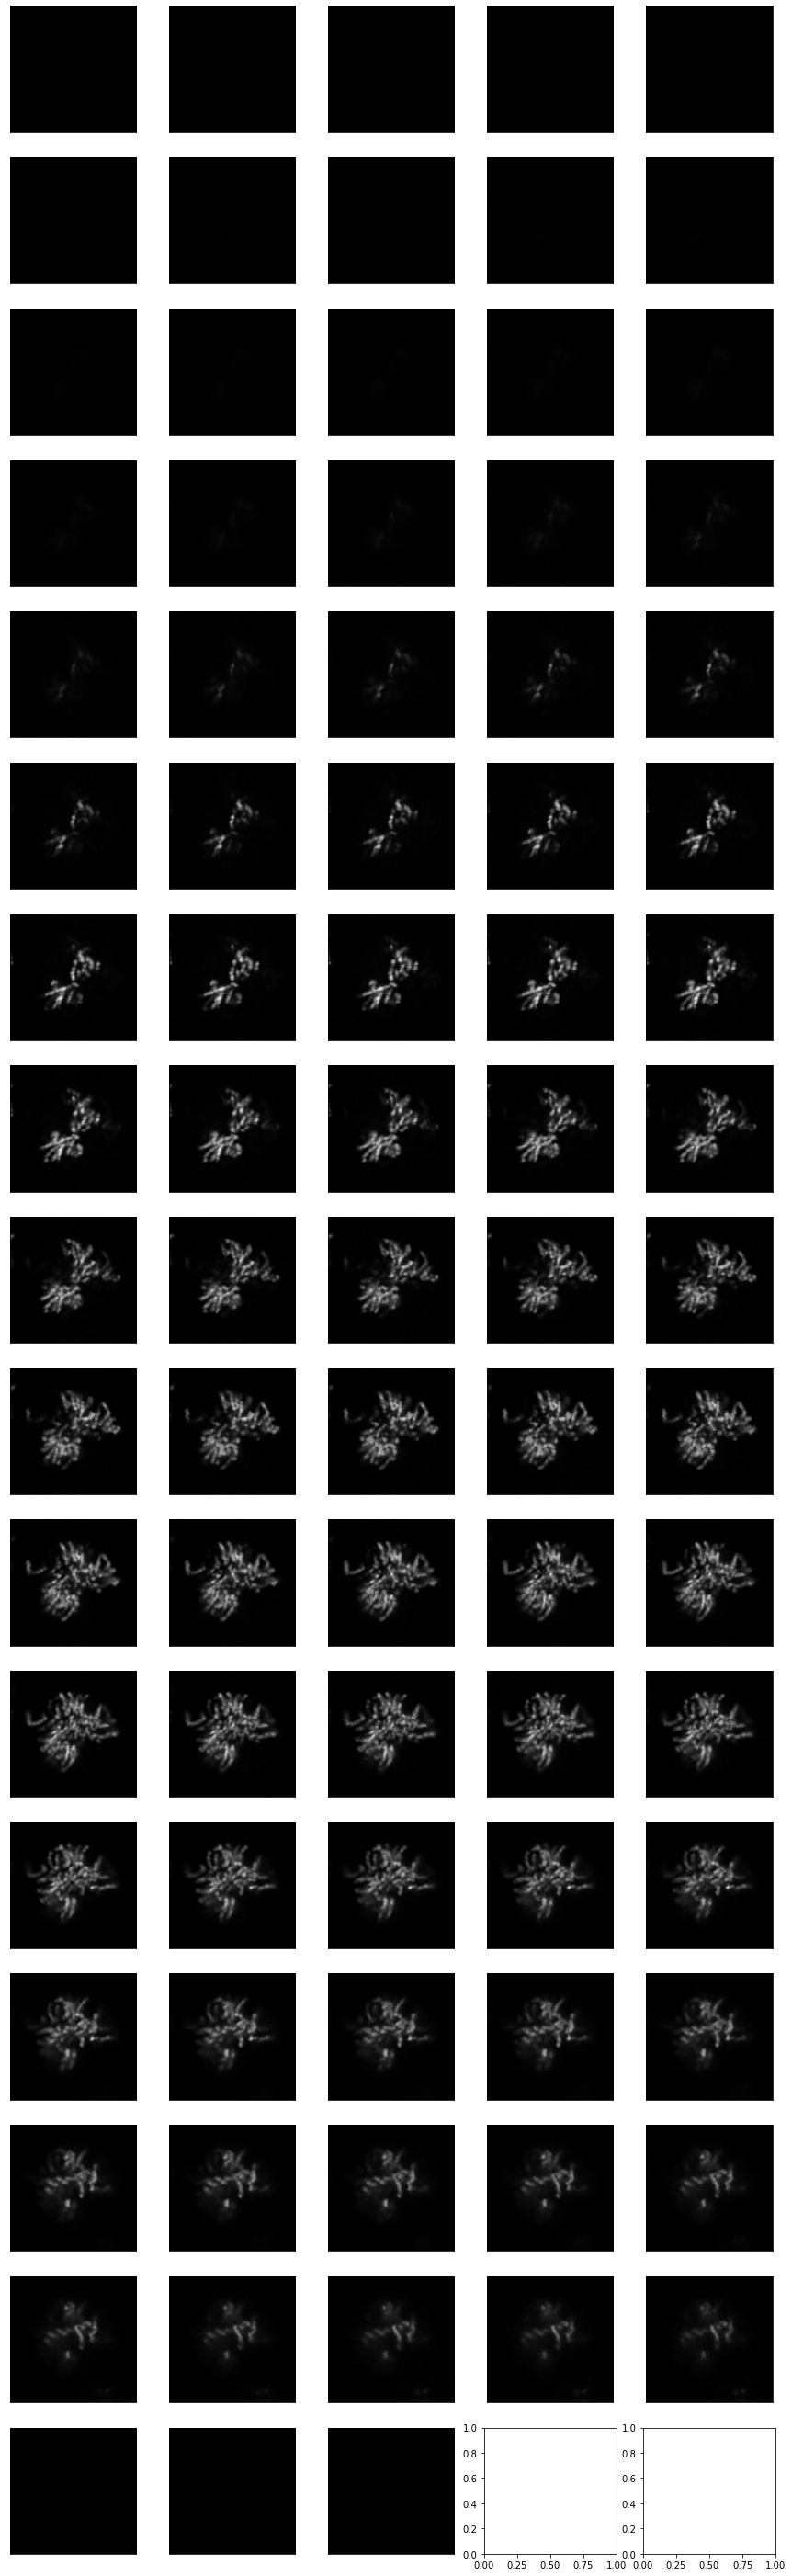

In [39]:
display(data2_edu)

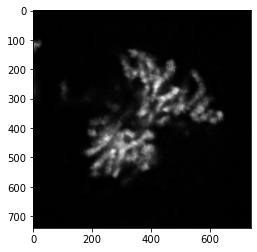

In [40]:
plt.imshow(data2_edu[42,:,:], cmap='gray')

In [41]:
image2 = data2_edu[42,:,:]

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 576x360 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

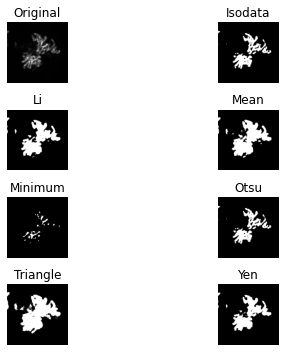

In [42]:
filters.try_all_threshold(image2)

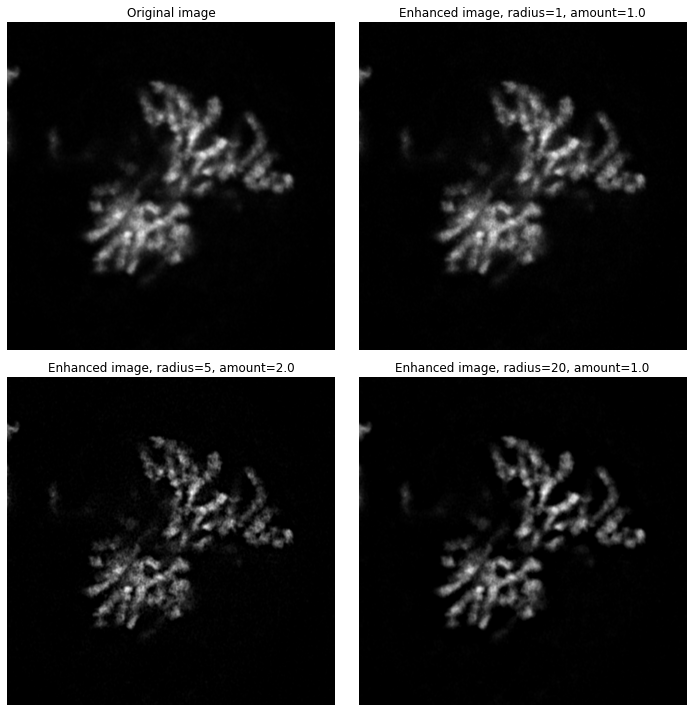

In [43]:
image = image2
result_1 = filters.unsharp_mask(image, radius=1, amount=1)
result_2 = filters.unsharp_mask(image, radius=5, amount=2)
result_3 = filters.unsharp_mask(image, radius=20, amount=1)

fig, axes = plt.subplots(nrows=2, ncols=2,
                         sharex=True, sharey=True, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original image')
ax[1].imshow(result_1, cmap=plt.cm.gray)
ax[1].set_title('Enhanced image, radius=1, amount=1.0')
ax[2].imshow(result_2, cmap=plt.cm.gray)
ax[2].set_title('Enhanced image, radius=5, amount=2.0')
ax[3].imshow(result_3, cmap=plt.cm.gray)
ax[3].set_title('Enhanced image, radius=20, amount=1.0')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

In [44]:
data_edu[27,:,:]

array([[ 3,  4,  6, ...,  0,  0,  3],
       [ 2,  4,  7, ...,  0,  0,  4],
       [ 1,  4,  8, ...,  0,  0,  4],
       ...,
       [ 4,  5,  4, ..., 30, 24, 13],
       [ 5,  6,  5, ..., 33, 27, 14],
       [ 4,  5,  4, ..., 32, 25, 13]], dtype=uint16)

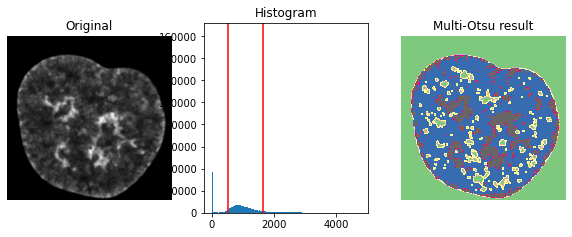

In [45]:
# The input image.
image = data_edu[27,:,:]

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = filters.threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

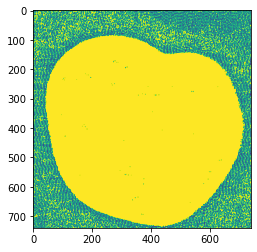

In [35]:
psf = np.ones((5, 5)) / 25
deconvolved, _ = restoration.unsupervised_wiener(data_edu[27,:,:], psf)
plt.imshow(deconvolved)

In [36]:
"""
HW Task 3:¶
Show how the noise affects your segmentation:

Try both images used so far.
Try Different levels of noise.
Try Denoising or blurring.
Explain your method of choice:

 - Unsupervised Wiener - seems far too harsh, perhaps could try playing with psf?
 - 
"""

'\nHW Task 3:¶\nShow how the noise affects your segmentation:\n\nTry both images used so far.\nTry Different levels of noise.\nTry Denoising or blurring.\nExplain your method of choice:\n\n - Unsupervised Wiener - seems far too harsh, perhaps could try playing with psf?\n - \n'

In [37]:
print("range: ({}, {})".format(data2.min(), data2.max()))

range: (0, 7868)


In [46]:
noise_mask = np.full((740, 740), 28, dtype=np.uint16)
noise_mask[320:-320, 320:-320] = 300

noise = 0.1*((noise_mask * np.random.random(noise_mask.shape) - 0.2 *
         noise_mask).astype(np.uint16))

In [47]:
noise

array([[1.5000e+00, 3.0000e-01, 6.5534e+03, ..., 6.5535e+03, 0.0000e+00,
        1.7000e+00],
       [1.8000e+00, 6.5531e+03, 1.6000e+00, ..., 4.0000e-01, 0.0000e+00,
        5.0000e-01],
       [2.0000e-01, 1.6000e+00, 1.6000e+00, ..., 2.0000e+00, 1.2000e+00,
        2.1000e+00],
       ...,
       [0.0000e+00, 0.0000e+00, 5.0000e-01, ..., 4.0000e-01, 7.0000e-01,
        6.5532e+03],
       [6.5534e+03, 5.0000e-01, 2.0000e-01, ..., 5.0000e-01, 5.0000e-01,
        7.0000e-01],
       [1.3000e+00, 1.6000e+00, 1.1000e+00, ..., 1.0000e-01, 1.9000e+00,
        1.3000e+00]])

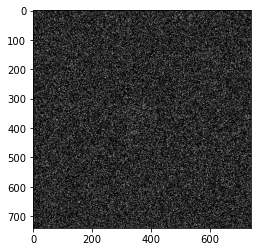

In [48]:
plt.imshow(noise, cmap='gray')


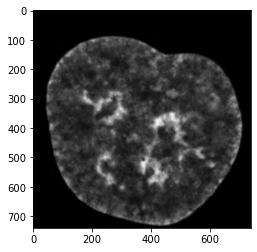

In [41]:
plt.imshow(image, cmap='gray')


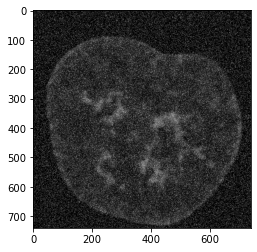

In [49]:
plt.imshow(image+noise, cmap='gray')

In [50]:
from skimage.util import random_noise
sigma = 0.02
noisy = random_noise(image, var=sigma**2)

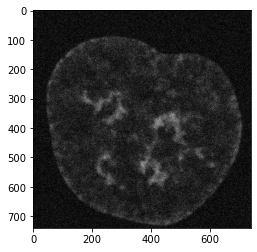

In [51]:
plt.imshow(noisy, cmap='gray')

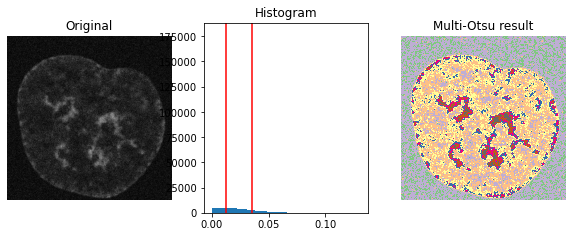

In [52]:
# The input image.
image = data_edu[27,:,:]

# Adding noise
from skimage.util import random_noise
sigma = 0.02
image = random_noise(image, var=sigma**2)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = filters.threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

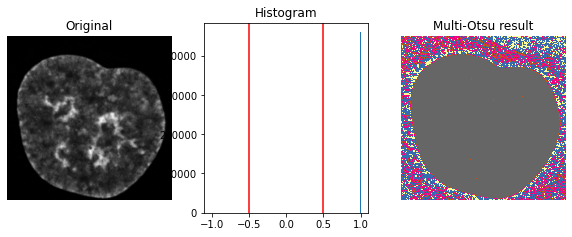

<Figure size 432x288 with 0 Axes>

In [53]:
# The input image.
original = data_edu[27,:,:]
image = data_edu[27,:,:]

# Adding noise
from skimage.util import random_noise
sigma = 0.02
image = random_noise(image, var=sigma**2)

# Deconvolution - unsupervised Wiener
psf = np.ones((5, 5)) / 25
image, _ = restoration.unsupervised_wiener(data_edu[27,:,:], psf)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = filters.threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(10, 3.5))

# Plotting the original image.
ax[0].imshow(original, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

plt.subplots_adjust()

plt.show()

In [18]:
"""
HW Task4:¶
Find an image of your experiments and:

Segment it.
Look at the effect of denoising
Look at the effect of removing background
https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_regional_maxima.html#sphx-glr-auto-examples-color-exposure-plot-regional-maxima-py
"""

'\nHW Task4:¶\nFind an image of your experiments and:\n\nSegment it.\nLook at the effect of denoising\nLook at the effect of removing background\nhttps://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_regional_maxima.html#sphx-glr-auto-examples-color-exposure-plot-regional-maxima-py\n'

In [57]:
timelapse_data = io.imread("/groups/gerlich/experiments/Experiments_005100/005153/01. Data/04. TIFF (output from Alberto processing)/Airyscan_2D_005156_AS_SiR-Hoechst_IBB-eGFP_63x_2021_03_03__17_59_59(7)-Airyscan Processing-02.tif")
print("shape: {}".format(timelapse_data.shape))
print("dtype: {}".format(timelapse_data.dtype))
print("range: ({}, {})".format(timelapse_data.min(), timelapse_data.max()))

shape: (240, 2, 2, 952, 952)
dtype: uint16
range: (0, 65280)


In [58]:
timelapse_data_lower_chromatin = timelapse_data[:,0,0,:,:]

In [59]:
timelapse_data_lower_chromatin.shape

(240, 952, 952)

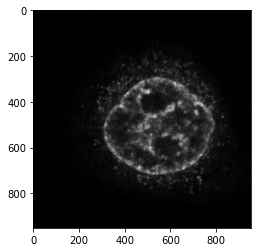

In [60]:
plt.imshow(timelapse_data_lower_chromatin[150,:,:],cmap="gray")

In [61]:
data.shape

(57, 740, 740, 4)

In [62]:
timelapse_data_lower_chromatin.shape

(240, 952, 952)

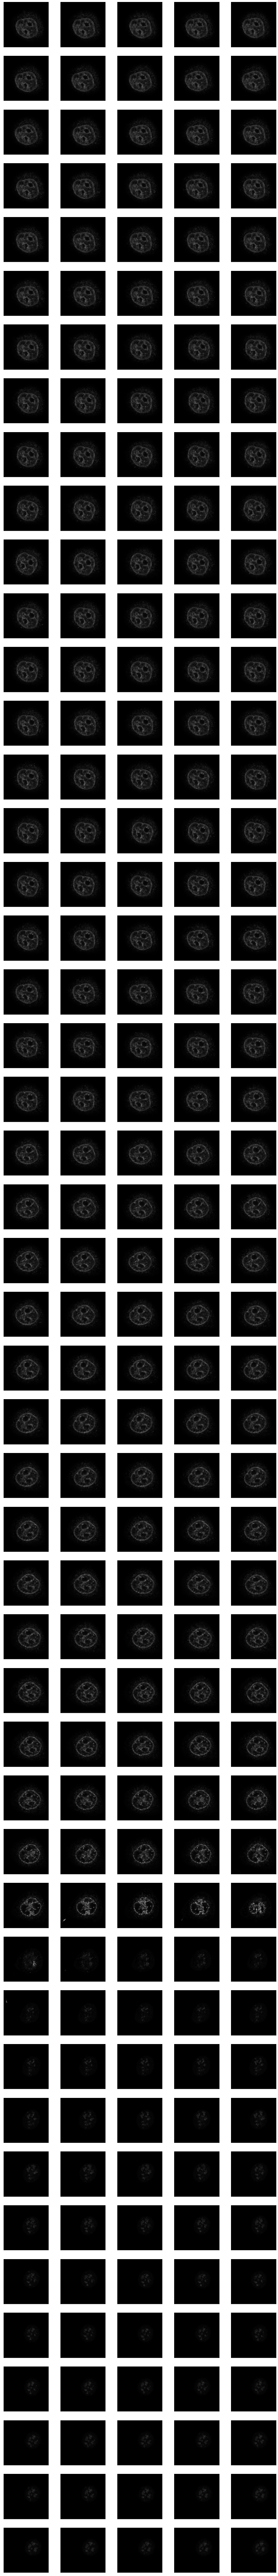

In [63]:
display(timelapse_data_lower_chromatin)

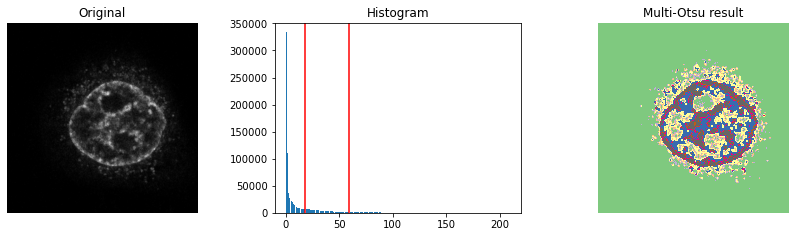

In [64]:
#Thresholding of my own data - unmodified image

# The input image.
image = timelapse_data_lower_chromatin[150,:,:]

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = filters.threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

In [78]:
from skimage.util import random_noise
sigma = 0.02
noisy = random_noise(timelapse_data_lower_chromatin[150,:,:], var=sigma**2)

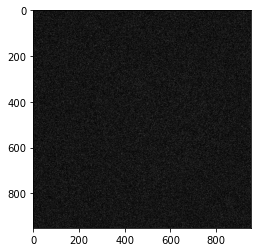

In [80]:
plt.imshow(noisy,cmap="gray")

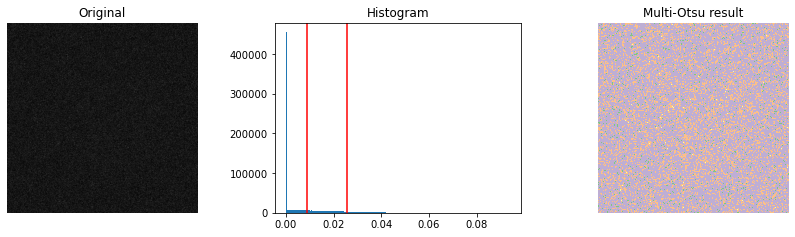

In [82]:
#Thresholding of my own data - noise added to image

from skimage.util import random_noise
sigma = 0.02

# The input image.
image = random_noise(timelapse_data_lower_chromatin[150,:,:], var=sigma**2)

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = filters.threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

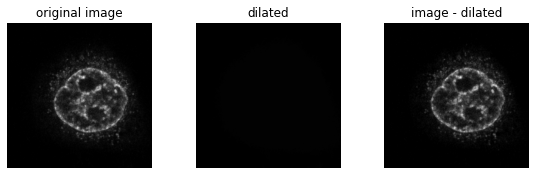

In [85]:
#Background removal

import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
image = img_as_float(timelapse_data_lower_chromatin[150,:,:])
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(8, 2.5),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')
ax0.axis('off')

ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')
ax1.axis('off')

ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')
ax2.axis('off')

fig.tight_layout()

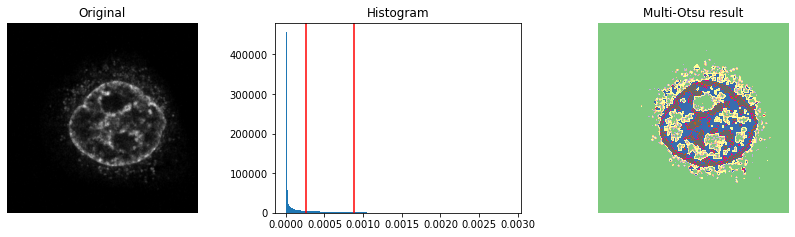

In [86]:
#Thresholding of my own data - background removed from image

# The input image.
image = image - dilated

# Applying multi-Otsu threshold for the default value, generating
# three classes.
thresholds = filters.threshold_multiotsu(image)

# Using the threshold values, we generate the three regions.
regions = np.digitize(image, bins=thresholds)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 3.5))

# Plotting the original image.
ax[0].imshow(image, cmap='gray')
ax[0].set_title('Original')
ax[0].axis('off')

# Plotting the histogram and the two thresholds obtained from
# multi-Otsu.
ax[1].hist(image.ravel(), bins=255)
ax[1].set_title('Histogram')
for thresh in thresholds:
    ax[1].axvline(thresh, color='r')

# Plotting the Multi Otsu result.
ax[2].imshow(regions, cmap='Accent')
ax[2].set_title('Multi-Otsu result')
ax[2].axis('off')

plt.subplots_adjust()

plt.show()

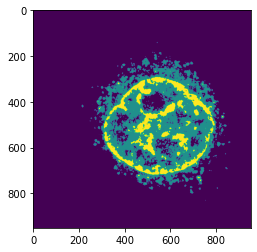

In [88]:
plt.imshow(regions)

In [ ]:
#play with erosion, dilation and expansion on own data